#### Leer e investigación

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from fancyimpute import KNN,IterativeImputer

In [67]:
data=pd.read_csv(r'US_Accidents_May19.csv',parse_dates=True)

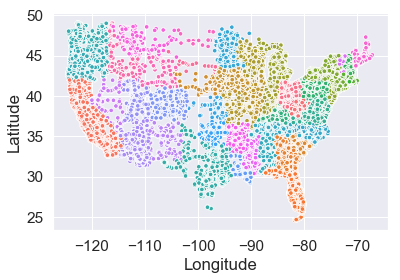

In [68]:
sns.scatterplot(x='End_Lng', y='End_Lat', data=data, hue='State',s=20, legend=False)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

##### Funciones

In [69]:
def f_to_c(str_temp_f):
    f1=float(str_temp_f-32)
    f2=f1**(5/9)
    return f2

def mph_to_kmh(str_speed_mph):
    return str_speed_mph*1.60934

def mi_to_km(str_dist_mi):
    return str_dist_mi/0.62137119

def inch_to_cm(str_dist_inch):
    return str_dist_inch*2.54

In [70]:
data['Temperature(C)']=data['Temperature(F)'].apply(f_to_c)
data['Wind_Chill(C)']=data['Wind_Chill(F)'].apply(f_to_c)
data['Wind_Speed(kmh)']=data['Wind_Speed(mph)'].apply(mph_to_kmh)
data['Distance(km)']=data['Distance(mi)'].apply(mi_to_km)
data['Visibility(km)']=data['Visibility(mi)'].apply(mi_to_km)
data['Pressure(cm)']=data['Pressure(in)'].apply(mi_to_km)
data['Precipitation(cm)']=data['Precipitation(in)'].apply(mi_to_km)

###### Limpieza cols

In [71]:
data_slim=data[['State','ID','Source','Severity','Start_Time','End_Time','Start_Lat','End_Lat','Start_Lng','End_Lng','Distance(km)','Side','City','Country','Humidity(%)','Pressure(cm)','Visibility(km)','Wind_Direction','Wind_Speed(kmh)','Precipitation(cm)','Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']]

##### Variable severity

In [72]:
data_slim['Severity'].value_counts()

2    1455524
3     715582
4      72002
1        814
0         17
Name: Severity, dtype: int64

In [73]:
data_slim=data_slim[data_slim['Severity'] > 0]
data_slim_red=data_slim.sample(n=5000,random_state=123)

In [74]:
#data_slim_red.columns
COLS_NULL=['Pressure(cm)','Visibility(km)','Distance(km)','Wind_Speed(kmh)','Precipitation(cm)']
for col in COLS_NULL:
    print('La columna {} tiene {}  valores nulos.'.format(col,data_slim_red[col].isnull().sum()))

La columna Pressure(cm) tiene 129  valores nulos.
La columna Visibility(km) tiene 158  valores nulos.
La columna Distance(km) tiene 0  valores nulos.
La columna Wind_Speed(kmh) tiene 939  valores nulos.
La columna Precipitation(cm) tiene 4411  valores nulos.


In [75]:
MICE_Imputer=IterativeImputer()

In [76]:
knn_data=data_slim_red[['Pressure(cm)','Visibility(km)','Distance(km)','Wind_Speed(kmh)','Precipitation(cm)']].select_dtypes(include='number').as_matrix()
Age_KNN=KNN(k=3).fit_transform(knn_data)

C:\Users\aoz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Imputing row 1/5000 with 2 missing, elapsed time: 5.924
Imputing row 101/5000 with 1 missing, elapsed time: 5.929
Imputing row 201/5000 with 2 missing, elapsed time: 5.935
Imputing row 301/5000 with 1 missing, elapsed time: 5.943
Imputing row 401/5000 with 1 missing, elapsed time: 5.950
Imputing row 501/5000 with 1 missing, elapsed time: 5.956
Imputing row 601/5000 with 2 missing, elapsed time: 5.960
Imputing row 701/5000 with 1 missing, elapsed time: 5.967
Imputing row 801/5000 with 1 missing, elapsed time: 5.974
Imputing row 901/5000 with 1 missing, elapsed time: 5.979
Imputing row 1001/5000 with 1 missing, elapsed time: 5.985
Imputing row 1101/5000 with 1 missing, elapsed time: 5.991
Imputing row 1201/5000 with 0 missing, elapsed time: 5.997
Imputing row 1301/5000 with 1 missing, elapsed time: 6.002
Imputing row 1401/5000 with 1 missing, elapsed time: 6.008
Imputing row 1501/5000 with 1 missing, elapsed time: 6.013
Imputing row 1601/5000 with 2 missing, elapsed time: 6.020
Imputing 

In [77]:
imputed_vals=pd.DataFrame(data=Age_KNN,columns=['Pressure(cm)_','Visibility(km)_','Distance(km)_','Wind_Speed(kmh)_','Precipitation(cm)_'])

In [78]:
COLS_NULL=['Pressure(cm)_','Visibility(km)_','Distance(km)_','Wind_Speed(kmh)_','Precipitation(cm)_']
for col in COLS_NULL:
    print('La columna {} tiene {}  valores nulos.'.format(col,imputed_vals[col].isnull().sum()))

La columna Pressure(cm)_ tiene 0  valores nulos.
La columna Visibility(km)_ tiene 0  valores nulos.
La columna Distance(km)_ tiene 0  valores nulos.
La columna Wind_Speed(kmh)_ tiene 0  valores nulos.
La columna Precipitation(cm)_ tiene 0  valores nulos.


In [79]:
complete_df=pd.concat([imputed_vals,data_slim_red.reset_index()],axis=1).drop(columns=['Pressure(cm)','Visibility(km)','Distance(km)','Wind_Speed(kmh)','Precipitation(cm)'])

In [80]:
#data_slim_red.columns
COLS_NULL=['Pressure(cm)_','Visibility(km)_','Distance(km)_','Wind_Speed(kmh)_','Precipitation(cm)_']
for col in COLS_NULL:
    print('La columna {} tiene {}  valores nulos.'.format(col,complete_df[col].isnull().sum()))

La columna Pressure(cm)_ tiene 0  valores nulos.
La columna Visibility(km)_ tiene 0  valores nulos.
La columna Distance(km)_ tiene 0  valores nulos.
La columna Wind_Speed(kmh)_ tiene 0  valores nulos.
La columna Precipitation(cm)_ tiene 0  valores nulos.


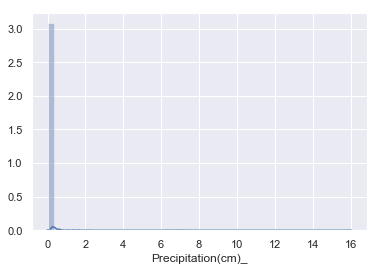

In [81]:
#'Pressure(cm)_','Visibility(km)_','Distance(km)_','Wind_Speed(kmh)_','Precipitation(cm)_'
sns.set()
#sns.boxplot(x=complete_df['Precipitation(cm)_'])
sns.distplot(complete_df['Precipitation(cm)_'])


In [82]:
display(complete_df['Precipitation(cm)_'].describe())

count    5000.000000
mean        0.035902
std         0.323735
min         0.000000
25%         0.000000
50%         0.008520
75%         0.028754
max        16.045160
Name: Precipitation(cm)_, dtype: float64

In [83]:
complete_df.sort_values(by=['Precipitation(cm)_'],ascending=False)
#complete_df=complete_df[complete_df['Distance(km)_'] < 90]
complete_df.to_csv('processed_data.csv')

##### Analisis

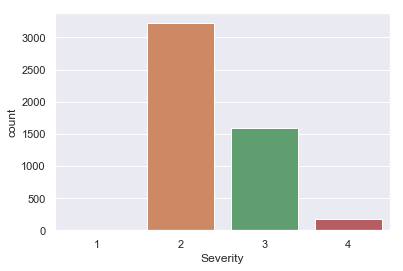

In [84]:
sns.countplot(x="Severity", data=complete_df)

In [85]:
complete_df['Severity'].value_counts()

2    3223
3    1598
4     177
1       2
Name: Severity, dtype: int64

In [86]:
complete_df['Year']=complete_df['Start_Time'].str[0:4]


NameError: name 'x_dates' is not defined

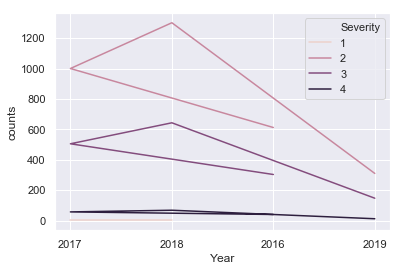

In [87]:
count_sev=complete_df[['Severity','Year']].groupby(['Severity','Year']).size().reset_index(name='counts').sort_values(by=['Year'])#.set_index('Year').sort_index()
ax=sns.lineplot(x='Year',y='counts',hue='Severity',data=count_sev,sort=False)#complete_df['Year_Month']
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
#ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

C:\Users\aoz\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\aoz\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


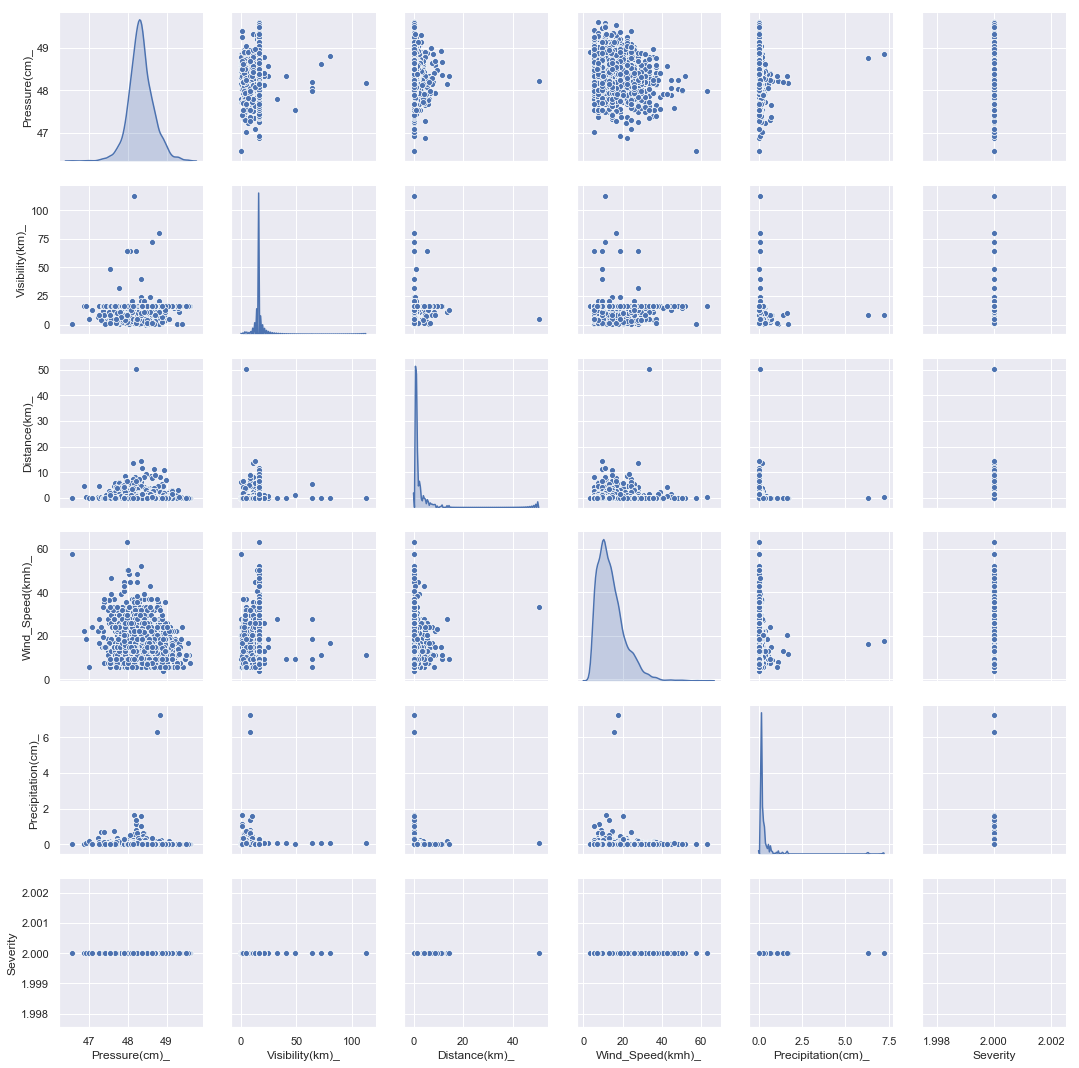

In [88]:
pair_plot_df=complete_df[['Pressure(cm)_','Visibility(km)_','Distance(km)_','Wind_Speed(kmh)_','Precipitation(cm)_','Severity']]
pair_plot_df=pair_plot_df[pair_plot_df['Severity']==2]
g = sns.pairplot(pair_plot_df, palette="Set2", diag_kind="kde", height=2.5)

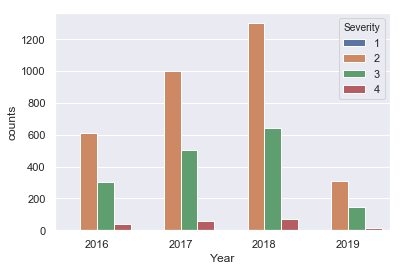

In [89]:
sns.barplot(x="Year", y="counts", data=count_sev,hue='Severity')

In [90]:
####Test Normalidad
from scipy.stats import shapiro

for col in COLS_NULL:
    stat, p = shapiro(imputed_vals[col])
    alpha = 0.05
    
    if p > alpha:
        print('No podemos rechazar H0')
    else:
        print('Podemos rechazar H0')
        

Podemos rechazar H0
Podemos rechazar H0
Podemos rechazar H0
Podemos rechazar H0
Podemos rechazar H0


In [91]:
#### Test varianza


import itertools
from scipy.stats import fligner

for a in zip(list(itertools.combinations(COLS_NULL, 2))):
    alpha = 0.05
    print('Comparando para variables {} y {}'.format(a[0][0],a[0][1]))
    stat,p=fligner(imputed_vals[a[0][0]],imputed_vals[a[0][1]])
    print('Valor de p {}'.format(p))
    if p > alpha:
        print('No podemos rechazar H0')
    else:
        print('Podemos rechazar H0')

Comparando para variables Pressure(cm)_ y Visibility(km)_
Valor de p 1.1797260325418636e-150
Podemos rechazar H0
Comparando para variables Pressure(cm)_ y Distance(km)_
Valor de p 3.2789334600776686e-184
Podemos rechazar H0
Comparando para variables Pressure(cm)_ y Wind_Speed(kmh)_
Valor de p 0.0
Podemos rechazar H0
Comparando para variables Pressure(cm)_ y Precipitation(cm)_
Valor de p 0.0
Podemos rechazar H0
Comparando para variables Visibility(km)_ y Distance(km)_
Valor de p 0.7008465229376128
No podemos rechazar H0
Comparando para variables Visibility(km)_ y Wind_Speed(kmh)_
Valor de p 0.0
Podemos rechazar H0
Comparando para variables Visibility(km)_ y Precipitation(cm)_
Valor de p 4.284561125856e-164
Podemos rechazar H0
Comparando para variables Distance(km)_ y Wind_Speed(kmh)_
Valor de p 0.0
Podemos rechazar H0
Comparando para variables Distance(km)_ y Precipitation(cm)_
Valor de p 3.167118106030708e-24
Podemos rechazar H0
Comparando para variables Wind_Speed(kmh)_ y Precipitatio

In [92]:
complete_df.columns

Index(['Pressure(cm)_', 'Visibility(km)_', 'Distance(km)_', 'Wind_Speed(kmh)_',
       'Precipitation(cm)_', 'index', 'State', 'ID', 'Source', 'Severity',
       'Start_Time', 'End_Time', 'Start_Lat', 'End_Lat', 'Start_Lng',
       'End_Lng', 'Side', 'City', 'Country', 'Humidity(%)', 'Wind_Direction',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Year'],
      dtype='object')

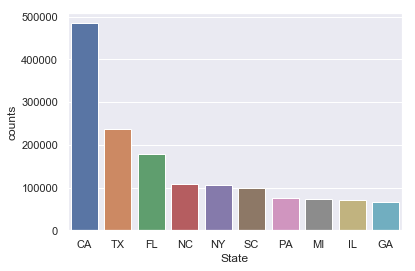

In [93]:
#count_by_state
#count_sev=complete_df[['Severity','Year']].groupby(['Severity','Year']).size().reset_index(name='counts')
count_by_state=data[['State']].groupby('State').size().reset_index(name='counts').sort_values(by='counts',ascending=False).head(10)
sns.barplot(x='State',y='counts',data=count_by_state)

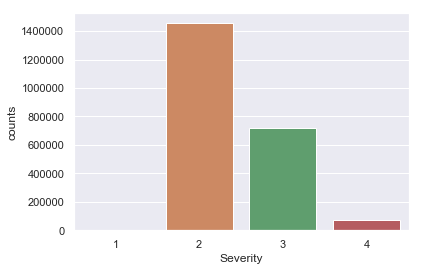

In [94]:
ca_data=data[data['State']=='CA']
ca_data=data[data['Severity']> 0]
ca_data_sev=ca_data[['Severity']].groupby('Severity').size().reset_index(name='counts')
sns.barplot(x='Severity',y='counts',data=ca_data_sev)

In [95]:
data_twil=data[['Civil_Twilight','Severity']].groupby(['Civil_Twilight','Severity']).size().reset_index(name='counts')
sns.barplot(x='Severity',y='counts',hue='Civil_Twilight',data=ca_data_sev)


ValueError: Could not interpret input 'Civil_Twilight'

[Text(0, 0, 'Clear'),
 Text(0, 0, 'Overcast'),
 Text(0, 0, 'Mostly Cloudy'),
 Text(0, 0, 'Partly Cloudy'),
 Text(0, 0, 'Scattered Clouds'),
 Text(0, 0, 'Light Rain')]

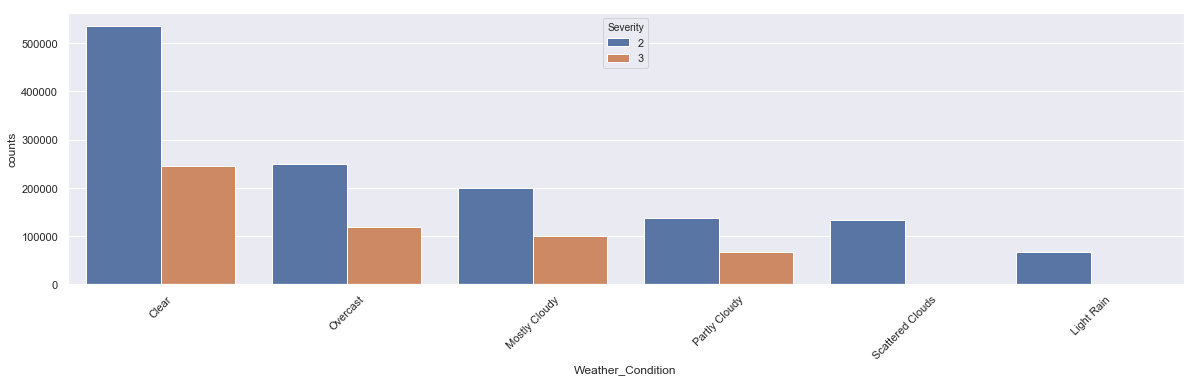

In [96]:
##temp
data_temp_cnt=data[['Weather_Condition','Severity']].groupby(['Weather_Condition','Severity']).size().reset_index(name='counts').sort_values(by='counts',ascending=False).head(10)
plt.figure(figsize=(20,5))
ax=sns.barplot(data=data_temp_cnt,x='Weather_Condition',hue='Severity',y='counts')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [97]:
data_bool_vars=data[['Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']]
pd_resumen=pd.DataFrame()

for col in data_bool_vars.columns:
    a=data[col].value_counts().to_frame().reset_index()
    print(a)
    pd_resumen=pd_resumen.append(a,ignore_index=True)
#data_bool_vars.groupby(['Bump', 'Crossing', 'Give_Way',
      # 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       #'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']).size().reset_index(name='counts')

   index     Bump
0  False  2243700
1   True      239
   index  Crossing
0  False   2122156
1   True    121783
   index  Give_Way
0  False   2239215
1   True      4724
   index  Junction
0  False   2056574
1   True    187365


C:\Users\aoz\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


   index  No_Exit
0  False  2241773
1   True     2166
   index  Railway
0  False  2225741
1   True    18198
   index  Roundabout
0  False     2243811
1   True         128
   index  Station
0  False  2207714
1   True    36225
   index  Traffic_Calming
0  False          2243321
1   True              618
   index  Traffic_Signal
0  False         1885291
1   True          358648
   index  Turning_Loop
0  False       2243939


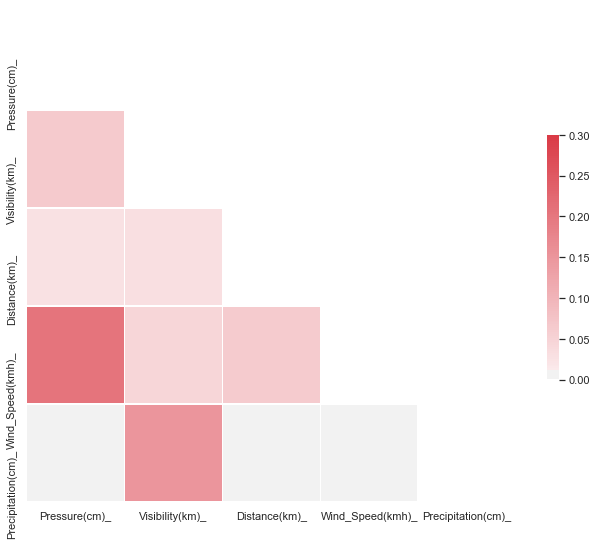

In [98]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
pair_plot_df_no_sev=pair_plot_df.drop(columns=['Severity'])

# Compute the correlation matrix
corr = abs(pair_plot_df_no_sev.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



In [99]:




from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
complete_df_ml=complete_df[['Pressure(cm)_','Visibility(km)_','Distance(km)_','Wind_Speed(kmh)_','Precipitation(cm)_']]
#complete_df_ml.iloc[:,0]=le.fit_transform(complete_df_ml.iloc[:,0])
#complete_df_ml.iloc[:,1]=le.fit_transform(complete_df_ml.iloc[:,1])

#complete_df_ml.iloc[:,4]=le.fit_transform(complete_df_ml.iloc[:,4])#
#complete_df_ml.iloc[:,2]=le.fit_transform(complete_df_ml.iloc[:,2])
#complete_df_ml.iloc[:,3]=le.fit_transform(complete_df_ml.iloc[:,3])


#y=le.fit_transform(complete_df.loc[:,['Severity']].fillna(value='Severity'))
y=complete_df.loc[:,['Severity']].fillna(value='Severity')
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(complete_df_ml,y,test_size=.20,random_state=0)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
pred=lr.predict(xtest)
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,pred))


"""
data_feature_names=['Pressure(cm)_','Visibility(km)_','Distance(km)_','Wind_Speed(kmh)_','Precipitation(cm)_']
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG
from IPython.display import display

graph = Source(tree.export_graphviz(complete_df, out_file=None, feature_names=data_feature_names, filled = True,rounded=True))


display(SVG(graph.pipe(format='svg')))

"""

C:\Users\aoz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aoz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.633


"\ndata_feature_names=['Pressure(cm)_','Visibility(km)_','Distance(km)_','Wind_Speed(kmh)_','Precipitation(cm)_']\nfrom sklearn.tree import export_graphviz\nfrom sklearn import tree\nfrom graphviz import Source\nfrom IPython.display import SVG\nfrom IPython.display import display\n\ngraph = Source(tree.export_graphviz(complete_df, out_file=None, feature_names=data_feature_names, filled = True,rounded=True))\n\n\ndisplay(SVG(graph.pipe(format='svg')))\n\n"

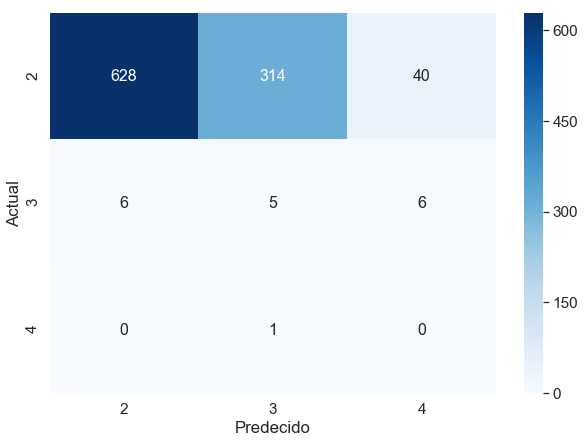

In [100]:

from sklearn.metrics import confusion_matrix
conf_matr=confusion_matrix(pred,ytest)
df_cm = pd.DataFrame(conf_matr, columns=np.unique(ytest), index = np.unique(ytest))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predecido'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')

In [117]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(xtrain,ytrain)
pred1=gb.predict(xtest)
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,pred1))

0.474


C:\Users\aoz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\naive_bayes.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [118]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)

dt.fit(xtrain,ytrain)
pred2=dt.predict(xtest)
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,pred2))

0.637


In [128]:
from sklearn.ensemble import RandomForestClassifier
num_est=['100,200,500,600,1200,3500,1000']

rc=RandomForestClassifier(n_estimators=930,max_depth=5,random_state=0,criterion='entropy')
rc.fit(xtrain,ytrain)
pred4=rc.predict(xtest)
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,pred4))

C:\Users\aoz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\aoz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\aoz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\aoz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users

C:\Users\aoz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\aoz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\aoz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\aoz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning

C:\Users\aoz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\aoz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\aoz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\aoz\AppData\Local\Continuum\anaconda3\lib\site-packages

C:\Users\aoz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\aoz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\aoz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\aoz\AppData\Local\Continuum\anaconda3\lib\site-packages

C:\Users\aoz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\aoz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\aoz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\aoz\AppData\Local\Continuum\anaconda3\lib\site-packages

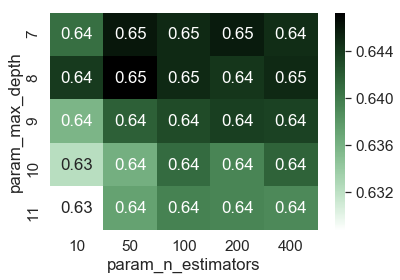

In [133]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


### desactivando futurewarnings por motivos estéticos del informe
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
###
param_grid = {'max_depth': np.arange(7,12),
               'n_estimators' : np.array([10,50,100,200,400])}
ran_forest = RandomForestClassifier(random_state=0)
gs_ran_forest=GridSearchCV(ran_forest,param_grid,cv=4)
gs_results_ran_forest=gs_ran_forest.fit(xtrain,ytrain)

init_pd=pd.pivot_table(pd.DataFrame(gs_results_ran_forest.cv_results_),values='mean_test_score',index='param_max_depth',columns='param_n_estimators')


cmap = sns.cubehelix_palette(light=1, as_cmap=True, start=2, rot=0, dark=0, reverse=False)
best_params=gs_results_ran_forest.best_params_
sns.heatmap(init_pd,cmap=cmap,annot=True)
